<a href="https://colab.research.google.com/github/jiiwon129/ESAA/blob/main/ESAA_YB_WEEK6_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **[ 개념정리 ]**

**03 앙상블 학습(Ensemble Learning)**

---

- Classification
  - 여러 개의 Classifier를 생성하고, 그 예측을 결합 -> 정확한 최종 예측을 도출하는 기법

1. 보팅(Voting)
  - 서로 다른 알고리즘을 가진 Classifier를 결합
2. 배깅(Bagging)
  - Classifier가 각각 모두 같은 유형의 알고리즘 기반
  - 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행하며 보팅을 수행
  - 랜덤 포레스트(Random Forest): 대표적인 배깅 방식
  - 부트스트래핑(Bootstrapping) 분할 방식: 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식
  
  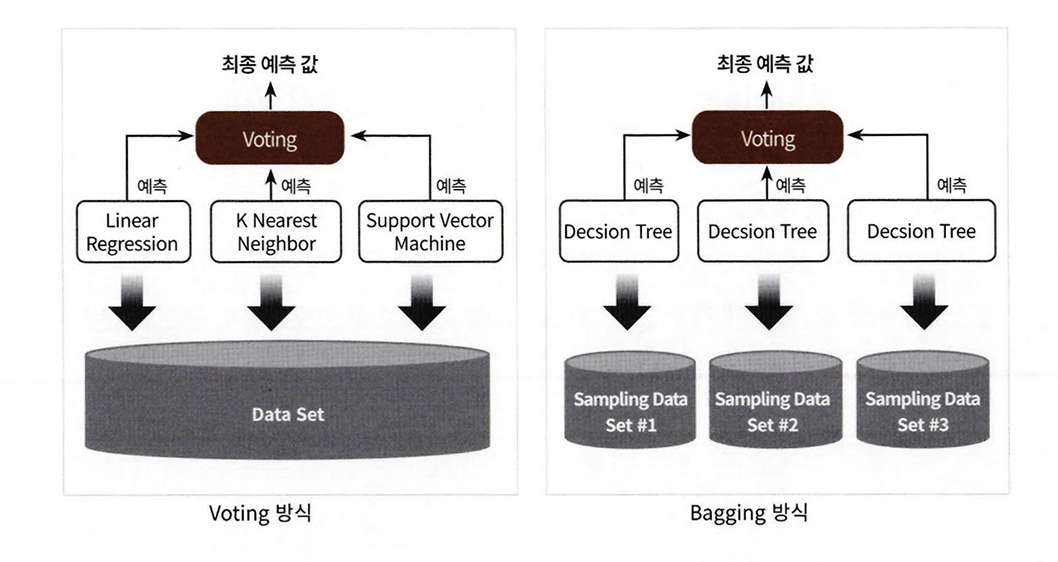
3. 부스팅(Boosting)



보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)

- 하드 보팅(Hard Voting)
  - 다수결 원칙: 예측한 결괏값들 중 다수의 Classifier가 결정한 예측값을 최종 보팅 결괏값으로 선정

- 소프트 보팅(Soft Voting)
  - Classifier들의 label 값 결정 확률을 모두 더하고 이를 평균해서 가장 높은 확률을 가지는 label 값을 최종 보팅 결괏값으로 선정
  - 일반적인 보팅 방법

  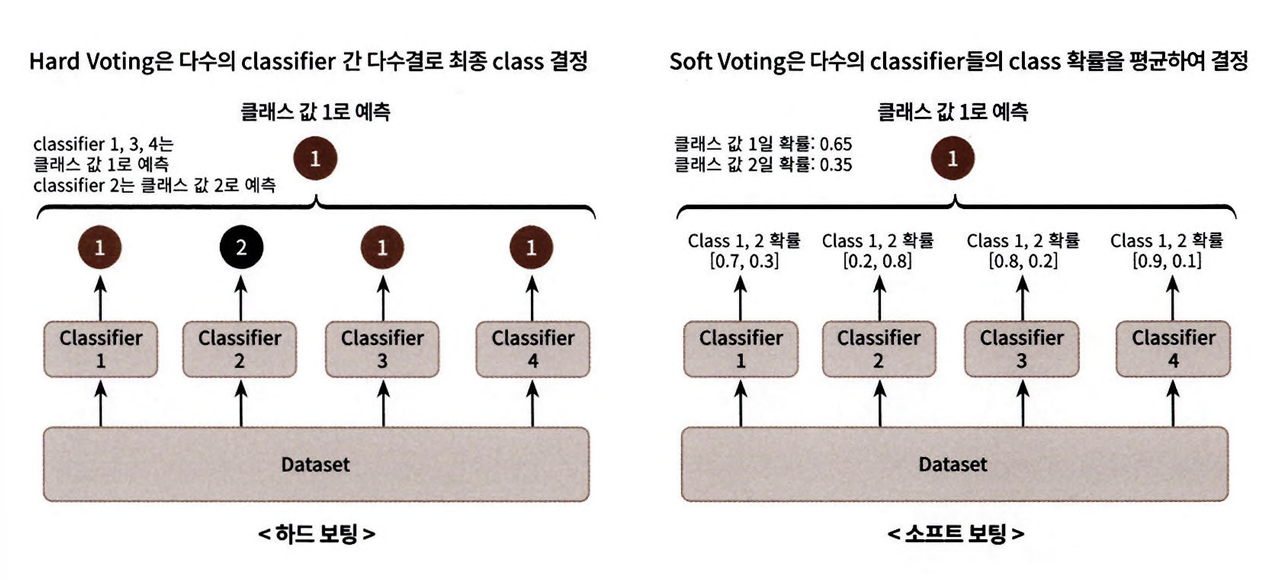

보팅 분류기(Voting Classifier)

```
from sklearn.ensemble import VotingClassifier

vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],voting='soft')

# 로지스틱 회귀, KNN 알고리즘 적용
# default voting='hard'
```

**04 랜덤 포레스트**

---

랜덤 포레스트의 개요 및 실습

- 배깅의 대표적인 알고리즘
- 비교적 빠른 수행 속도를 보임
- 기반 알고리즘: 결정 트리(Decision Tree)
- 개별 트리가 학습하는 데이터 세트를 전체 데이터에서 일부가 **중첩되게** 샘플링된 데이터 세트
  - 부트스트래핑(bootsrapping) 분할 방식
  - 랜덤 포레스트의 서브세트(Subset) 생성
    - subset의 데이터 건수는 전체 데이터 건수와 동일
    - n_estimators = k : k개의 Subset

    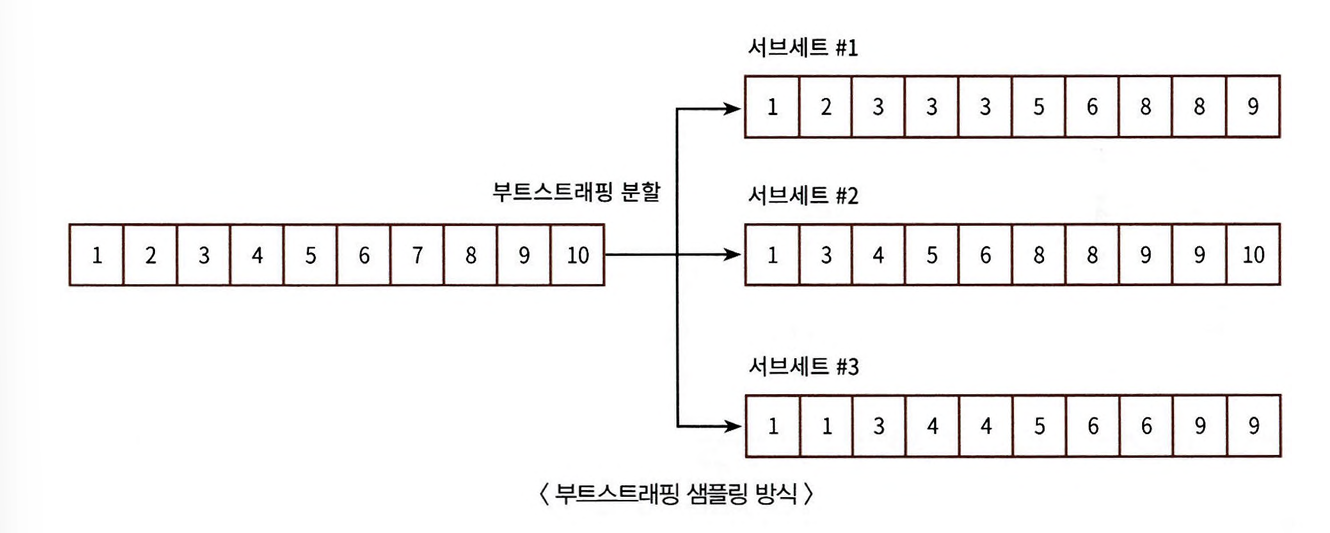

```
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0, max_depth=k)
```

랜덤 포레스트 하이퍼 파라미터 및 튜닝

- n_estimators: 랜덤 포레스트에서 결정 트리의 개수 지정 (default=10)
- max_features, max_depth, min_samples_leaf, min_samples_split

- GridSearchCV 생성 시 n_jobs=-1 추가 시 모든 CPU 코어를 이용해 학습

- RandomForestClassifier.feature_importances_
  - 알고리즘이 선택한 피쳐의 중요도를 알 수 있음

**05 GBM(Gradient Boosting Machine)**

---

GBM의 개요 및 실습

- 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하며 잘못 예측한 데이터에 거중치(weights) 부여를 통해 오류 개선

1. 에이다 부스트(AdaBoost)
  - 오류 데이터에 가중치를 부여하며 부스팅을 수행하는 대표적인 알고리즘
2. 그레디언트 부스트(Gradient Boost)
  - 에이다부스트와 유사
  - 가중치 업데이트에 경사 하강법(Gradient Descent)을 이용

```
from sklearn.ensemble import GradientBoostingClassifier
```

GBM 하이퍼 파라미터 소개

- loss: 경사 하강법에서 사용할 비용 함수 지정 (default='deviance')
- learning_rate: GBM이 학습을 진행할 때마다 적용하는 학습률
  - Weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수
  - learning_rate를 작게 하고, n_estimators를 크게 하면 더 이상 성능이 좋아지지 않은 한계점까지는 예측 성능이 조금씩 좋아질 수 있음
- n_estimators: weak learner의 개수
- subsample: weak learner가 학습에 사용하는 데이터의 샘플링 비율 (default=1)

**06 XGBoost(eXtra Gradient Boost)**

---

XGBoost 개요

- 뛰어난 예측 성능
- GBM 대비 빠른 수행 시간
- 과적합 규제 (Regulation)
- Tree pruning(나무 가지치기)
- 자체 내장된 교차 검증
- 결손값 자체 처리

- XGBoost 패키지의 사이킷런 래퍼 클래스
  - XGBClassifier
  - XGBRegressor

과적합(Overfitting) 문제 해결법
1. eta 값을 낮춤
2. max_depth 값을 낮춤
3. min_child_weight 값을 높임
4. gamma 값을 높임
5. subsample, colsample_bytree 조정

조기 중단(Early Stopping)
- 수행 속도 향상 대표적 기능

파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

- plot_importance
  - 피처의 중요도를 시각화해주는 모듈
  - 파라미터: 앞에서 학습이 완료된 모델 객체 및 맷플롯립의 ax 객체 입력

```
import xgboost as xgb
from xgboost import plot_importance
```

DMatrix
- XGBoost만의 전용 데이터 객체
- 주요 입력 파라미터: data, label
- data: 피처 데이터 세트
- label
  - Classification: 레이블 데이터 세트
  - Regression: 숫자형인 종속값 데이터 세트

XGBoost의 하이퍼 파라미터
- 주로 딕셔너리 형태로 입력

- num_rounds = k : 부스팅 반복 횟수

사이킷런 래퍼 XGBoost의 개요 및 적용

```
from xgboost import XGBClassifier

evals=[(X_tr,y_tr),(X_val,y_val)]

xgb_wrapper = XGBClassifier(n_estimators=k1, learning_rate=k2, early_stopping_rounds=k3, eval_metric="logloss", eval_set=evals, verbose=True)




### **[ 필사 ]**

##### **03 앙상블 학습**

앙상블 학습 개요

보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)

보팅 분류기(Voting Classifier)

In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer=load_breast_cancer()

data_df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [2]:
# 개별 모델은 로지스틱 회귀와 KNN임.
lr_clf=LogisticRegression(solver='liblinear')
knn_clf=KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],voting='soft')

X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,
                                               test_size=0.2,random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train,y_train)
pred=vo_clf.predict(X_test)
print("Voting 분류기 정확도: {0:.4f}".format(accuracy_score(y_test,pred)))

# 개별 모델의 학습/예측/평가
classifiers=[lr_clf,knn_clf]
for classifier in classifiers:
  classifier.fit(X_train,y_train)
  pred=classifier.predict(X_test)
  class_name=classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name,accuracy_score(y_test,pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


##### **04 랜덤 포레스트**

랜덤 포레스트의 개요 및 실습

In [3]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df=pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                              columns=['dup_cnt'])
  feature_dup_df=feature_dup_df.reset_index()
  new_feature_name_df=pd.merge(old_feature_name_df.reset_index(),feature_dup_df,how='outer')
  new_feature_name_df['column_name']=new_feature_name_df[['column_name',
                                                          'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                            if x[1] > 0 else x[0], axis=1)
  new_feature_name_df=new_feature_name_df.drop(['index'],axis=1)
  return new_feature_name_df

In [4]:
import pandas as pd

def get_human_dataset():

  # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
  feature_name_df=pd.read_csv('/content/drive/MyDrive/ESAA YB/dataset/UCI HAR Dataset/features.txt',sep='\s+',
                              header=None,names=['column_index','column_name'])
  # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
  new_feature_name_df=get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 반환
  feature_name=new_feature_name_df.iloc[:,1].values.tolist()

  # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
  X_train=pd.read_csv('/content/drive/MyDrive/ESAA YB/dataset/UCI HAR Dataset/train/X_train.txt',sep='\s+',
                      names=feature_name)
  X_test=pd.read_csv('/content/drive/MyDrive/ESAA YB/dataset/UCI HAR Dataset/test/X_test.txt',sep='\s+',
                     names=feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train=pd.read_csv('/content/drive/MyDrive/ESAA YB/dataset/UCI HAR Dataset/train/y_train.txt',sep='\s+',
                      header=None,names=['action'])
  y_test=pd.read_csv('/content/drive/MyDrive/ESAA YB/dataset/UCI HAR Dataset/test/y_test.txt',sep='\s+',
                     header=None,names=['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train,X_test,y_train,y_test

X_train,X_test,y_train,y_test=get_human_dataset()

<ipython-input-3-861b1d31c9e0>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[1] > 0 else x[0], axis=1)
<ipython-input-3-861b1d31c9e0>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train,X_test,y_train,y_test=get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf=RandomForestClassifier(random_state=0,max_depth=8)
rf_clf.fit(X_train,y_train)
pred=rf_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9220


랜덤 포레스트 하이퍼 파라미터 및 튜닝

In [6]:
from sklearn.model_selection import GridSearchCV

params={
    'max_depth':[8,16,24],
    'min_samples_leaf':[1,6,12],
    'min_samples_split':[2,8,16]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf=RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
grid_cv=GridSearchCV(rf_clf,param_grid=params,cv=2,n_jobs=-1)
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 16}
최고 예측 정확도: 0.9157


In [7]:
rf_clf1=RandomForestClassifier(n_estimators=100,min_samples_leaf=6,max_depth=16,
                               min_samples_split=2,random_state=0)
rf_clf1.fit(X_train,y_train)
pred=rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9253


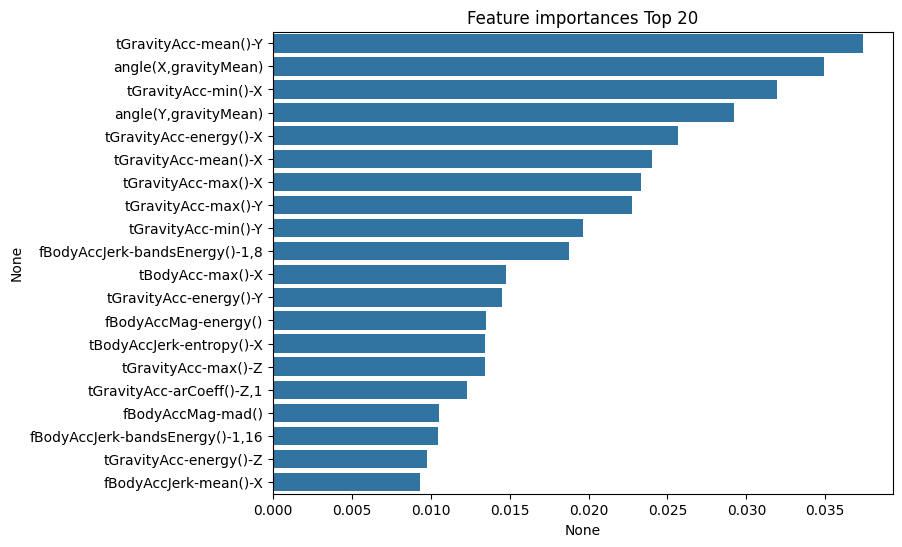

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values=rf_clf1.feature_importances_
ftr_importances=pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()

##### **05 GBM(Gradient Boosting Machine)**

GBM의 개요 및 실습

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train,X_test,y_train,y_test=get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정
start_time=time.time()

gb_clf=GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
gb_pred=gb_clf.predict(X_test)
gb_accuracy=accuracy_score(y_test,gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f} 초'.format(time.time()-start_time))

GBM 정확도: 0.9379
GBM 수행 시간: 1590.5 초


##### **06 XGBoost(eXtra Gradient Boost)**

XGBoost 개요

XGBoost 설치하기

In [10]:
!pip install xgboost==2.1.4

In [6]:
import xgboost as xgb
from xgboost import XGBClassifier

파이썬 래퍼 XGBoost 하이퍼 파라미터

In [7]:
import xgboost

print(xgboost.__version__)

2.1.4


파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

In [8]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset=load_breast_cancer()
features=dataset.data
labels=dataset.target
cancer_df=pd.DataFrame(data=features,columns=dataset.feature_names)
cancer_df['target']=labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [9]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [10]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫 번째 칼럼에서 맨 마지막 두 번째 칼럼까지를 :-1 슬라이싱으로 추출.
X_features=cancer_df.iloc[:,:-1]
y_label=cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train,X_test,y_train,y_test=train_test_split(X_features,y_label,test_size=0.2,
                                               random_state=156)
# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr,X_val,y_tr,y_val=train_test_split(X_train,y_train,test_size=0.1,
                                       random_state=156)
print(X_train.shape,X_test.shape)
print(X_tr.shape,X_val.shape)


(455, 30) (114, 30)
(409, 30) (46, 30)


In [11]:
# 만약 구버전 XGBoost에서 DataFrame으로 DMaxtrix 생성이 안 될 경우 X_train.values로 넘파이 변환.
# 학습, 검증, 테스트용 DMatrix를 생성.
dtr=xgb.DMatrix(data=X_tr,label=y_tr)
dval=xgb.DMatrix(data=X_val,label=y_val)
dtest=xgb.DMatrix(data=X_test,label=y_test)

In [12]:
params={'max_depth':3,
        'eta':0.05,
        'objective':'binary:logistic',
        'eval_metric':'logloss'}
num_rounds=400

In [13]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval'로 평가합니다.
eval_list=[(dtr,'train'),(dval,'eval')] # 또는 eval_list=[(dval,'eval)] 만 명기해도 무방.

# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model=xgb.train(params=params,dtrain=dtr,num_boost_round=num_rounds,
                    early_stopping_rounds=50,evals=eval_list)

[0]	train-logloss:0.62480	eval-logloss:0.63104
[1]	train-logloss:0.58674	eval-logloss:0.60478
[2]	train-logloss:0.55226	eval-logloss:0.58223
[3]	train-logloss:0.52086	eval-logloss:0.56184
[4]	train-logloss:0.49192	eval-logloss:0.54118
[5]	train-logloss:0.46537	eval-logloss:0.52223
[6]	train-logloss:0.44029	eval-logloss:0.50287
[7]	train-logloss:0.41666	eval-logloss:0.48620
[8]	train-logloss:0.39525	eval-logloss:0.46974
[9]	train-logloss:0.37542	eval-logloss:0.45497
[10]	train-logloss:0.35701	eval-logloss:0.44131
[11]	train-logloss:0.33982	eval-logloss:0.43134
[12]	train-logloss:0.32297	eval-logloss:0.41972
[13]	train-logloss:0.30725	eval-logloss:0.40902
[14]	train-logloss:0.29327	eval-logloss:0.39883
[15]	train-logloss:0.27946	eval-logloss:0.38968
[16]	train-logloss:0.26691	eval-logloss:0.38150
[17]	train-logloss:0.25473	eval-logloss:0.37368
[18]	train-logloss:0.24385	eval-logloss:0.36666
[19]	train-logloss:0.23338	eval-logloss:0.35994
[20]	train-logloss:0.22320	eval-logloss:0.35374
[2

In [14]:
pred_probs=xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds=[1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:',preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.938 0.004 0.75  0.049 0.98  1.    0.999 0.999 0.998 0.001]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [15]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,roc_auc_score

def get_clf_eval(y_test,pred=None,pred_proba=None):
  confusion=confusion_matrix(y_test,pred)
  accuracy=accuracy_score(y_test,pred)
  precision=precision_score(y_test,pred)
  recall=recall_score(y_test,pred)
  f1=f1_score(y_test,pred)
  # ROC-AUC 추가
  roc_auc=roc_auc_score(y_test,pred_proba)
  print('오차 행렬')
  print(confusion)
  # ROC-AUC print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))

In [16]:
get_clf_eval(y_test,preds,pred_probs)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도: 0.9740, 재현율: 0.9740, F1:0.9740, AUC:0.9965


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

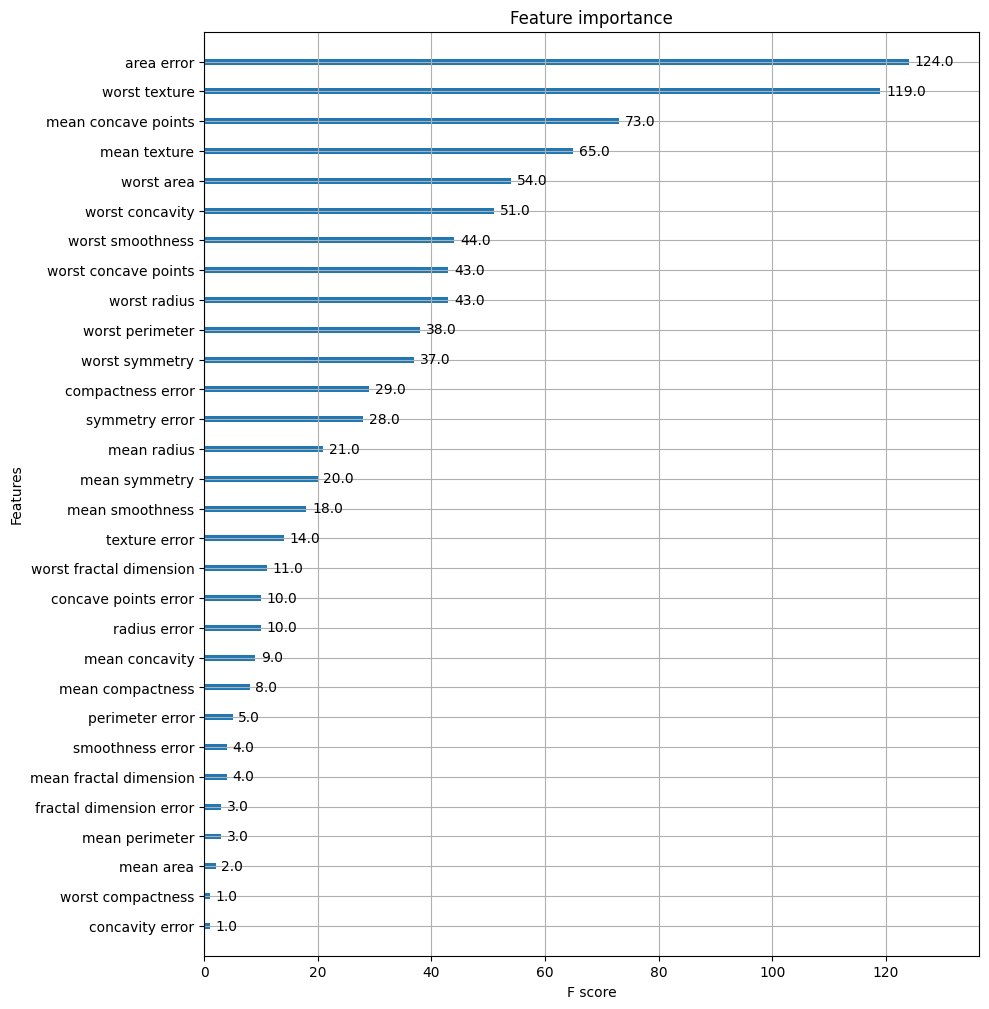

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
plot_importance(xgb_model,ax=ax)

사이킷런 래퍼 XGBoost의 개요 및 적용

In [18]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메세지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력.
xgb_wrapper=XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3,
                          eval_metric='logloss')
xgb_wrapper.fit(X_train,y_train,verbose=True)
w_preds=xgb_wrapper.predict(X_test)
w_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]

In [19]:
get_clf_eval(y_test,w_preds,w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870, F1:0.9806, AUC:0.9954


In [20]:
from xgboost.sklearn import XGBClassifier

xgb_wrapper=XGBClassifier(n_estimators=400,learning_rate=0.05,max_depth=3,
                          early_stopping_rounds=50,eval_metric="logloss")
evals=[(X_tr,y_tr),(X_val,y_val)]
xgb_wrapper.fit(X_tr,y_tr,eval_set=evals,verbose=True)
ws50_preds=xgb_wrapper.predict(X_test)
ws50_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.62480	validation_1-logloss:0.63104
[1]	validation_0-logloss:0.58674	validation_1-logloss:0.60478
[2]	validation_0-logloss:0.55226	validation_1-logloss:0.58223
[3]	validation_0-logloss:0.52086	validation_1-logloss:0.56184
[4]	validation_0-logloss:0.49192	validation_1-logloss:0.54118
[5]	validation_0-logloss:0.46537	validation_1-logloss:0.52223
[6]	validation_0-logloss:0.44029	validation_1-logloss:0.50287
[7]	validation_0-logloss:0.41666	validation_1-logloss:0.48620
[8]	validation_0-logloss:0.39525	validation_1-logloss:0.46974
[9]	validation_0-logloss:0.37542	validation_1-logloss:0.45497
[10]	validation_0-logloss:0.35701	validation_1-logloss:0.44131
[11]	validation_0-logloss:0.33982	validation_1-logloss:0.43134
[12]	validation_0-logloss:0.32297	validation_1-logloss:0.41972
[13]	validation_0-logloss:0.30725	validation_1-logloss:0.40902
[14]	validation_0-logloss:0.29327	validation_1-logloss:0.39883
[15]	validation_0-logloss:0.27946	validation_1-logloss:0.38968
[1

In [21]:
get_clf_eval(y_test,ws50_preds,ws50_pred_proba)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도: 0.9740, 재현율: 0.9740, F1:0.9740, AUC:0.9961


In [22]:
# early_stopping_rounds를 10으로 설정하고 재학습.
xgb_wrapper=XGBClassifier(n_estimators=400,learning_rate=0.05,max_depth=3,
                          early_stopping_rounds=10,eval_metric="logloss")
xgb_wrapper.fit(X_tr,y_tr,eval_set=evals,verbose=True)

ws10_preds=xgb_wrapper.predict(X_test)
ws10_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test,ws10_preds,ws10_pred_proba)

[0]	validation_0-logloss:0.62480	validation_1-logloss:0.63104
[1]	validation_0-logloss:0.58674	validation_1-logloss:0.60478
[2]	validation_0-logloss:0.55226	validation_1-logloss:0.58223
[3]	validation_0-logloss:0.52086	validation_1-logloss:0.56184
[4]	validation_0-logloss:0.49192	validation_1-logloss:0.54118
[5]	validation_0-logloss:0.46537	validation_1-logloss:0.52223
[6]	validation_0-logloss:0.44029	validation_1-logloss:0.50287
[7]	validation_0-logloss:0.41666	validation_1-logloss:0.48620
[8]	validation_0-logloss:0.39525	validation_1-logloss:0.46974
[9]	validation_0-logloss:0.37542	validation_1-logloss:0.45497
[10]	validation_0-logloss:0.35701	validation_1-logloss:0.44131
[11]	validation_0-logloss:0.33982	validation_1-logloss:0.43134
[12]	validation_0-logloss:0.32297	validation_1-logloss:0.41972
[13]	validation_0-logloss:0.30725	validation_1-logloss:0.40902
[14]	validation_0-logloss:0.29327	validation_1-logloss:0.39883
[15]	validation_0-logloss:0.27946	validation_1-logloss:0.38968
[1

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

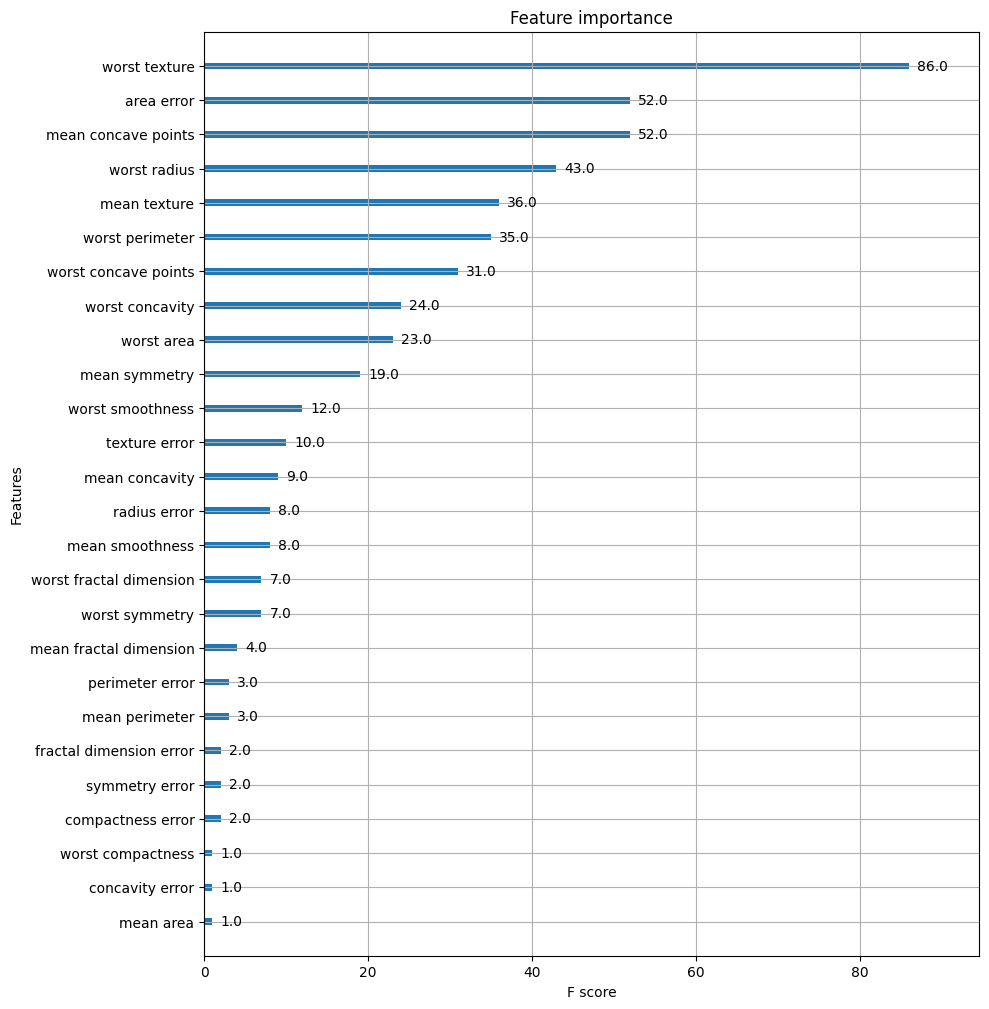

In [23]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
# 사이킷런 래퍼 클래스를 입력해도 무방.
plot_importance(xgb_wrapper,ax=ax)